**Imports**

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Flatten, Dense
from tensorflow.keras.models import Sequential

from sklearn.model_selection import train_test_split



**Data Processing**

In [17]:
#splitting data
(train_imgs,train_labels), (test_imgs,test_labels) = mnist.load_data()

#image labels
digits = np.unique(train_labels)
print('digits:', digits)
print(train_imgs.shape)

#preprocessing
train_imgs = train_imgs.reshape(-1, 28, 28, 1)
test_imgs = test_imgs.reshape(-1, 28, 28, 1)

train_imgs = train_imgs / 255
test_imgs = test_imgs / 255

img_shape = (28, 28, 1)

#encoding digit types
train_labels_code = tf.keras.utils.to_categorical(train_labels)
test_labels_code = tf.keras.utils.to_categorical(test_labels)

#test split
train_x, valid_x, train_y, valid_y = train_test_split(train_imgs, train_labels_code, test_size=0.3, random_state=10)


digits: [0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


**Model construction**

In [36]:
layer1_bs = 32
layer2_bs = 32

convNet = Sequential()

convNet.add(Conv2D(layer1_bs, kernel_size=3, activation='relu', input_shape=img_shape))
convNet.add(Conv2D(layer2_bs, kernel_size=3, activation='relu'))
convNet.add(Flatten())
convNet.add(Dense(10, activation='softmax'))
convNet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


**Training**

In [37]:
convNet.fit(train_x, train_y, validation_data=(valid_x,valid_y), epochs=3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/3
42000/42000 [==============================] - 70s 2ms/sample - loss: 0.1534 - accuracy: 0.9548 - val_loss: 0.0815 - val_accuracy: 0.9758
Epoch 2/3
42000/42000 [==============================] - 90s 2ms/sample - loss: 0.0573 - accuracy: 0.9822 - val_loss: 0.0640 - val_accuracy: 0.9811
Epoch 3/3
42000/42000 [==============================] - 86s 2ms/sample - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.0659 - val_accuracy: 0.9816


In [38]:
convNet.save('digit_convNet.h5py')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: digit_convNet.h5py\assets


**Testing**

In [3]:
dig = tf.keras.models.load_model('digit_convNet.h5py')


In [4]:
test = dig.predict(test_imgs)
test = np.argmax(np.round(test), axis = 1)


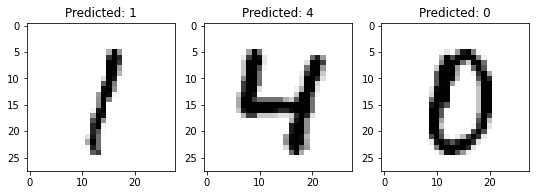

In [6]:
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(9,3))

for i, j in enumerate([ax1, ax2, ax3]):
    j.imshow(test_imgs[57-i], cmap='binary')
    j.set_title('Predicted: {}'.format(test[57-i]))
    j.grid(False)
